In [1]:
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
mag_data_MF=pd.DataFrame()
for p, path in enumerate(glob.glob("Data/ensemble/*")) :
    mag_data_MF_current = pd.read_csv(path)
    mag_data_MF_current['graph']=p*np.ones(len(mag_data_MF_current))
    mag_data_MF = mag_data_MF.append(mag_data_MF_current)

mag_data_MF=mag_data_MF.rename(columns={'graph':'Graph'})
mag_data_MF['Graph']=[int(k+1) for k in mag_data_MF['Graph'].to_list()]

In [3]:
mag_data_MF

,Unnamed: 0,beta_factor,Mean_mag_MF,MB1_MF,MB2_MF,MB3_MF,init_state_num,initial_state,Graph
0,0,5.0,0.975812,0.999907,0.998501,0.929028,0,[-0.52837073 -0.52837073 -0.52837073 ... 0.36...,1
1,0,5.0,0.975811,0.999907,0.998501,0.929024,1,[-0.87017683 -0.87017683 -0.87017683 ... 0.40...,1
2,0,5.0,0.275576,0.999888,0.819858,-0.993017,2,[ 0.20985375 0.20985375 0.20985375 ... -0.49...,1
3,0,5.0,0.275577,0.999888,0.819861,-0.993017,3,[ 0.20097791 0.20097791 0.20097791 ... -0.89...,1
4,0,5.0,0.975811,0.999907,0.998501,0.929025,4,[-0.73897866 -0.73897866 -0.73897866 ... 0.23...,1
...,...,...,...,...,...,...,...,...,...
1245,0,0.5,0.001758,0.246398,0.000252,-0.241377,45,[-0.14452534 -0.14452534 -0.14452534 ... -0.29...,15
1246,0,0.5,0.001753,0.246392,0.000248,-0.241379,46,[-0.57261352 -0.57261352 -0.57261352 ... -0.38...,15
1247,0,0.5,0.001750,0.246400,0.000237,-0.241387,47,[ 0.46649014 0.46649014 0.46649014 ... -0.55...,15
1248,0,0.5,0.001755,0.246395,0.000250,-0.241378,48,[-0.57177573 -0.57177573 -0.57177573 ... -0.71...,15


## Show all samples

Text(0, 0.5, 'Magnetisation')

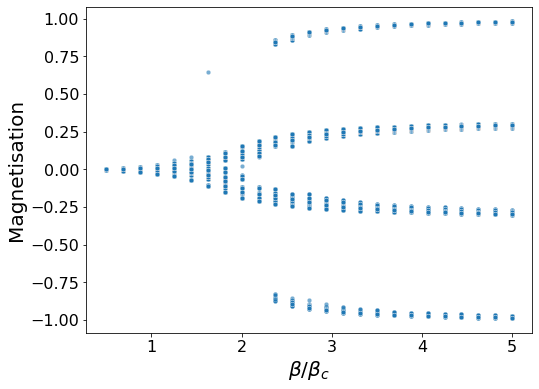

In [4]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(data=mag_data_MF,x='beta_factor',y='Mean_mag_MF',palette='Set1',alpha=0.6,s=20)

plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16,rotation=0)
plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
plt.ylabel("Magnetisation",fontsize=20)

## Show a subset of samples

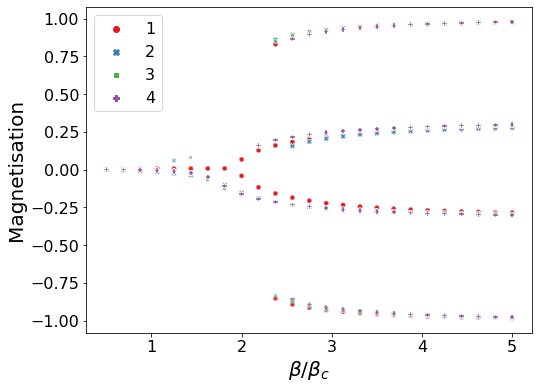

In [5]:
num_graphs=4
sample_graphs=mag_data_MF.loc[mag_data_MF['Graph']<=num_graphs]


fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(data=sample_graphs,x='beta_factor',y='Mean_mag_MF',hue='Graph',palette='Set1',style='Graph',alpha=0.6,s=20)

plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16,rotation=0)
plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
plt.ylabel("Magnetisation",fontsize=20)
plt.legend(fontsize=16)
plt.savefig("Plots/MF_ensemble_phase_diag.jpg",bbox_inches='tight')